In [1]:
import pandas as pd

import matplotlib.pyplot as plt


df=pd.read_csv('/Users/apple/Desktop/projects/2024_loksabha_elections/data/data.csv',index_col=0)


winners_df=df[df['rank']==1 & (df['party_name'] != 'Independent')]

top_ten_parties=winners_df.groupby('short_form')['short_form'].count()

 
top_ten_parties = top_ten_parties.rename('seats_won')


top_ten_parties_df = top_ten_parties.reset_index()

top_ten_parties_df.columns = ['party', 'seats']

top_ten_parties_df=top_ten_parties_df.sort_values(by=['seats'],ascending=False,ignore_index=True).head(10)

top_ten_parties_df


color_code={"AAAP":"#0072B0", "ADAL":"#8F5E1C", "ADMK":"#A08547","AGP":"#3B02C9", "AIFB":"#ff3333", "AIMIM":"#00664d", "AITC":"#aebedf", 
            "AIUDF":"#8AB3C5", "AJSUP":"#3A15F9","BHRS":"#F84996", "BJD":"#9547A2", "BJP":"#ff944d", "BOPF":"#4D73AE", "BSP":"#000078", 
            "CPI":"#e70d21", "CPI(M)":"#FF1D15", "CPI(ML)(L)":"#E97D43", "DMDK":"#E6C018", "DMK":"#05F86E", "INC":"#19AAED", "INLD":"#EA0D35", 
            "IUML":"#006600", "JD(S)":"#02865A", "JD(U)":"#39AC57", "JKN":"#1094D3", "JKNPPB":"#3879C4", "JKPDP":"#87C2B9", "JMM":"#337316", 
            "JNJP":"#00009C", "KEC(M)":"#A209D6", "LJPRV":"#A2006D", "MNF":"#2E5694", "NCP":"#4bc0c0", "NCPSP":"#EC79FD", "NDPP":"#483D8B", 
            "NOTA":"#ff6384", "NPEP":"#ffb84d", "NPF":"#306D29", "RJD":"#D6901B", "RLTP":"#99cc00", "RVLTGONP":"#0BFE5D", "SAD":"#715B2F", 
            "SDF":"#68C539", "SHS":"#D2691E", "SHSUBT":"#30F59B", "SKM":"#9A485D", "SP":"#ff0000", "TDP":"#204795", "UDP":"#AD6812", "UPPL":"#51F4A9", 
            "VOTPP":"#A17693", "YSRCP":"#eb3734", "ZPM":"#B3B300", "Others":"#b3b3b3"}

Top 10 Parites by Seats won

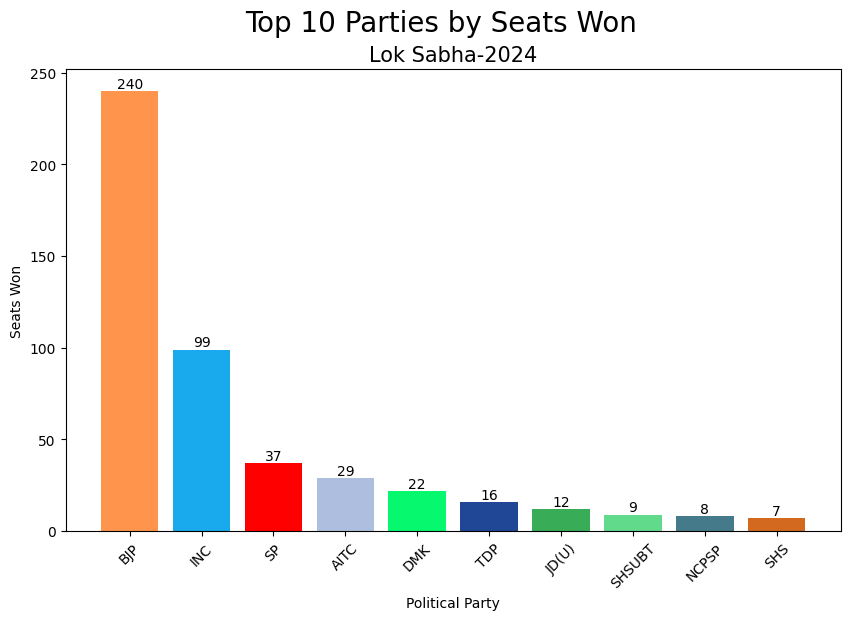

In [2]:
#Define labels and colors from ECI (https://results.eci.gov.in/PcResultGenJune2024/index.htm)

labels = ['BJP','INC','SP','AITC','DMK','TDP','JD(U)','SHSUBT','NCPSP','SHS','YSRCP','BSP','CPI-M','RJD']
colors = ['#ff944d','#19AAED','#ff0000','#aebedf','#05F86E','#204795','#39AC57','#61DA8C','#457A8B','#D2691E','#eb3734','#000078','#FF1D15','#D6901B']

# Map the colors to the parties
party_colors = {label: color for label, color in zip(labels, colors)}

# Extract the colors for the top ten parties
top_ten_colors = [party_colors.get(party, '#b3b3b3') for party in top_ten_parties_df['party']]


plt.figure(figsize=(10, 6))
bars = plt.bar(top_ten_parties_df['party'], top_ten_parties_df['seats'], color=top_ten_colors)

# Add labels on top of the bars
for bar, color in zip(bars, top_ten_colors):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom', ha='center', color='black')  # va: vertical alignment

plt.xlabel('Political Party')
plt.ylabel('Seats Won')
plt.suptitle('Top 10 Parties by Seats Won',fontsize=20)
plt.title('Lok Sabha-2024',fontsize=15)
plt.xticks(rotation=45)

plt.savefig('/Users/apple/Desktop/projects/2024_loksabha_elections/images/top_ten_seats.png')


plt.show()

Top 10 Parties by Votes Share

In [3]:

vote_share_df=df.groupby('short_form')['total_votes'].sum()
vote_share_df

vote_share_df=vote_share_df.rename('vote_share')
vote_share_df = round(100*(vote_share_df / vote_share_df.sum()),2)


vote_share_df = vote_share_df.reset_index()

vote_share_df.columns = ['party', 'vote_share']

vote_share_df=vote_share_df.sort_values(by=['vote_share'],ascending=False,ignore_index=True).head(10)


vote_share_df





,party,vote_share
0,BJP,36.57
1,INC,21.19
2,SP,4.58
3,AITC,4.37
4,Ind,2.76
5,YSRCP,2.06
6,BSP,2.04
7,TDP,1.98
8,DMK,1.82
9,CPI-M,1.76


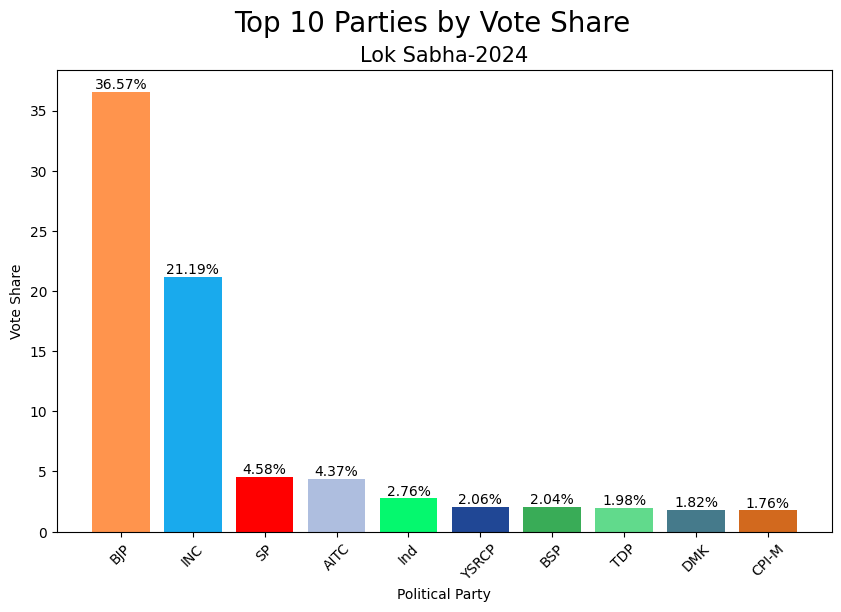

In [4]:
plt.figure(figsize=(10, 6))
bars = plt.bar(vote_share_df['party'], vote_share_df['vote_share'], color=top_ten_colors)

# Add labels on top of the bars
for bar, color in zip(bars, top_ten_colors):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f"{float(yval)}%", va='bottom', ha='center', color='black')  # Add % suffix

plt.xlabel('Political Party')
plt.ylabel('Vote Share')
plt.suptitle('Top 10 Parties by Vote Share',fontsize=20)
plt.title('Lok Sabha-2024',fontsize=15)
plt.xticks(rotation=45)

plt.savefig('/Users/apple/Desktop/projects/2024_loksabha_elections/images/top_ten_voteshare.png')


plt.show()

#Seat Share vs Vote Share

In [5]:
df

,state_name,constituency_name,constituency_type,party_name,short_form,candidate_name,EVM_votes,postal_votes,total_votes,rank,notes
election_year,,,,,,,,,,,
2024,Andaman and Nicobar Islands,Andaman & Nicobar Islands,General,Bharatiya Janata Party,BJP,BISHNU PADA RAY,102182.0,254,102436,1,NaN
2024,Andaman and Nicobar Islands,Andaman & Nicobar Islands,General,Indian National Congress,INC,KULDEEP RAI SHARMA,77829.0,211,78040,2,NaN
2024,Andaman and Nicobar Islands,Andaman & Nicobar Islands,General,Andaman Nicobar Democratic Congress,Other-236,MANOJ PAUL,8236.0,18,8254,3,NaN
2024,Andaman and Nicobar Islands,Andaman & Nicobar Islands,General,Communist Party of India (Marxist),CPI-M,D AYYAPPAN,6009.0,8,6017,4,NaN
2024,Andaman and Nicobar Islands,Andaman & Nicobar Islands,General,Independent,Ind,V.K. ABDUL AZIZ,2195.0,8,2203,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024,West Bengal,Birbhum,General,Independent,Ind,ABDUL IMRAN,3823.0,9,3832,10,NaN
2024,West Bengal,Birbhum,General,All India Arya Mahasabha,Other-254,BISWAJIT MISHRA,3806.0,17,3823,11,NaN
2024,West Bengal,Birbhum,General,Bharatiya National Janata Dal,Other-212,MD. JAKIR HOSSAIN,2547.0,10,2557,12,NaN
